In [1]:
from get_dataset import * 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers
import seaborn as sns

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-20 09:27:47.141504: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
ds_train = get_dataset("train").batch(64)
ds_test = get_dataset("test").batch(64)

2023-04-20 09:27:57.024066: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7378 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [29]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.Bidirectional(layers.SimpleRNN(64)),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_11 (Bidirecti  (None, 128)              24832     
 onal)                                                           
                                                                 
 dense_13 (Dense)            (None, 12)                1548      
                                                                 
Total params: 26,380
Trainable params: 26,380
Non-trainable params: 0
_________________________________________________________________


In [30]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30
348/348 [==============================] - 20s 53ms/step - loss: 2.1480 - accuracy: 0.2351 - val_loss: 2.2294 - val_accuracy: 0.2301
Epoch 2/30
348/348 [==============================] - 19s 51ms/step - loss: 2.0394 - accuracy: 0.2843 - val_loss: 2.2267 - val_accuracy: 0.2337
Epoch 3/30
348/348 [==============================] - 18s 51ms/step - loss: 2.0837 - accuracy: 0.2655 - val_loss: 2.1962 - val_accuracy: 0.2525
Epoch 4/30
348/348 [==============================] - 18s 52ms/step - loss: 2.0368 - accuracy: 0.2893 - val_loss: 2.2008 - val_accuracy: 0.2434
Epoch 5/30
348/348 [==============================] - 18s 52ms/step - loss: 2.0319 - accuracy: 0.2932 - val_loss: 2.1964 - val_accuracy: 0.2451
Epoch 6/30
348/348 [==============================] - 19s 51ms/step - loss: 2.0366 - accuracy: 0.2876 - val_loss: 2.1963 - val_accuracy: 0.2519
Epoch 6: early stopping


In [45]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_21 (Bidirecti  (None, 256)              198912    
 onal)                                                           
                                                                 
 dense_21 (Dense)            (None, 12)                3084      
                                                                 
Total params: 201,996
Trainable params: 201,996
Non-trainable params: 0
_________________________________________________________________


2023-04-20 10:41:52.469465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:41:52.470579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:41:52.471346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [46]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30


2023-04-20 10:41:56.034957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:41:56.036148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:41:56.037063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

    343/Unknown - 7s 9ms/step - loss: 1.5143 - accuracy: 0.4524

2023-04-20 10:42:02.688836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:42:02.689957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:42:02.690720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

348/348 [==============================] - 7s 11ms/step - loss: 1.5041 - accuracy: 0.4565 - val_loss: 0.9366 - val_accuracy: 0.6962
Epoch 2/30
348/348 [==============================] - 4s 10ms/step - loss: 0.6194 - accuracy: 0.7956 - val_loss: 0.6433 - val_accuracy: 0.7932
Epoch 3/30
348/348 [==============================] - 4s 10ms/step - loss: 0.4232 - accuracy: 0.8633 - val_loss: 0.4911 - val_accuracy: 0.8494
Epoch 4/30
348/348 [==============================] - 4s 10ms/step - loss: 0.3386 - accuracy: 0.8928 - val_loss: 0.4626 - val_accuracy: 0.8536
Epoch 5/30
348/348 [==============================] - 4s 10ms/step - loss: 0.2932 - accuracy: 0.9060 - val_loss: 0.4416 - val_accuracy: 0.8656
Epoch 6/30
348/348 [==============================] - 4s 10ms/step - loss: 0.2448 - accuracy: 0.9204 - val_loss: 0.4337 - val_accuracy: 0.8705
Epoch 7/30
348/348 [==============================] - 4s 10ms/step - loss: 0.2118 - accuracy: 0.9316 - val_loss: 0.4545 - val_accuracy: 0.8698
Epoch 8/30

In [47]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_22 (Bidirecti  (None, 256)              198912    
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 12)                3084      
                                                                 
Total params: 201,996
Trainable params: 201,996
Non-trainable params: 0
_________________________________________________________________


2023-04-20 10:42:48.513108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:42:48.514162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:42:48.514890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [48]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30


2023-04-20 10:42:50.757322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:42:50.758702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:42:50.759525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

    348/Unknown - 5s 9ms/step - loss: 1.5175 - accuracy: 0.4479

2023-04-20 10:42:56.217960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:42:56.219162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:42:56.220021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

348/348 [==============================] - 6s 11ms/step - loss: 1.5175 - accuracy: 0.4479 - val_loss: 0.9915 - val_accuracy: 0.6800
Epoch 2/30
348/348 [==============================] - 4s 10ms/step - loss: 0.6277 - accuracy: 0.7943 - val_loss: 0.6015 - val_accuracy: 0.8059
Epoch 3/30
348/348 [==============================] - 4s 10ms/step - loss: 0.4303 - accuracy: 0.8591 - val_loss: 0.5328 - val_accuracy: 0.8400
Epoch 4/30
348/348 [==============================] - 4s 10ms/step - loss: 0.3437 - accuracy: 0.8891 - val_loss: 0.4586 - val_accuracy: 0.8536
Epoch 5/30
348/348 [==============================] - 4s 10ms/step - loss: 0.2884 - accuracy: 0.9055 - val_loss: 0.4787 - val_accuracy: 0.8552
Epoch 6/30
348/348 [==============================] - 4s 10ms/step - loss: 0.2489 - accuracy: 0.9199 - val_loss: 0.4529 - val_accuracy: 0.8562
Epoch 7/30
348/348 [==============================] - 4s 10ms/step - loss: 0.2140 - accuracy: 0.9299 - val_loss: 0.4104 - val_accuracy: 0.8718
Epoch 8/30

2023-04-20 10:44:07.362537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:44:07.363788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:44:07.364585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

49/49 [==============================] - 1s 5ms/step


2023-04-20 10:44:07.884564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


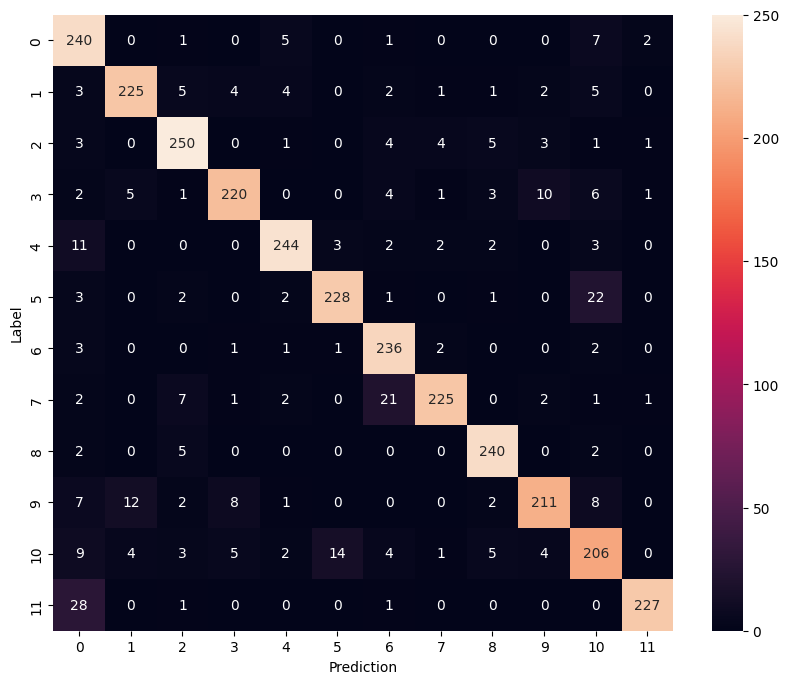

In [49]:
y_pred = model.predict(ds_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(ds_test.map(lambda s,lab: lab)), axis=0)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
